#Image Segmentation and Superimposition 

In [ ]:
from PIL import Image
from PIL import ImageFilter

In [ ]:
dogFile = 'dog.jpg'
backgroundFile = 'background.jpg'

with Image.open(dogFile) as dogImg:
  dogImg.load()

with Image.open(backgroundFile) as backImg:
  backImg.load()

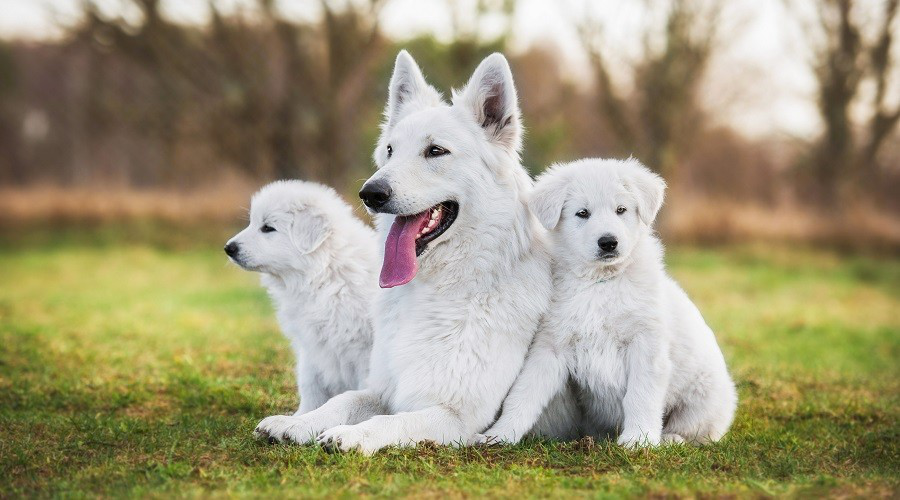

In [ ]:
dogImg

In [ ]:
backImg

Here we will extracts dogs from one image and put it inside another inage

In [ ]:
backImg = backImg.transpose(Image.FLIP_LEFT_RIGHT)

backImg

In [ ]:
dogImg.mode

'RGB'

In [ ]:
dogImg.size

(900, 500)

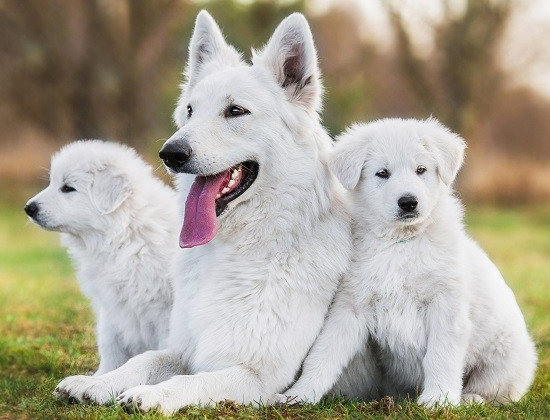

In [ ]:
dogImg = dogImg.crop((200, 40, 750, 460))
dogImg

In [ ]:
def displaySidebySide(*images, vertical = False):
  width, height = images[0].width, images[0].height
  fullImgSize = (
      (width, height*len(images))
      if vertical
      else (width*len(images), height)
  )
  fullImg = Image.new(images[0].mode, fullImgSize)
  row, col = 0, 0
  for image in images:
    fullImg.paste(image, (row, col))
    if vertical:
      col += height
    else:
      row += width
  return fullImg

In [ ]:
dogImgGray = dogImg.convert("L")

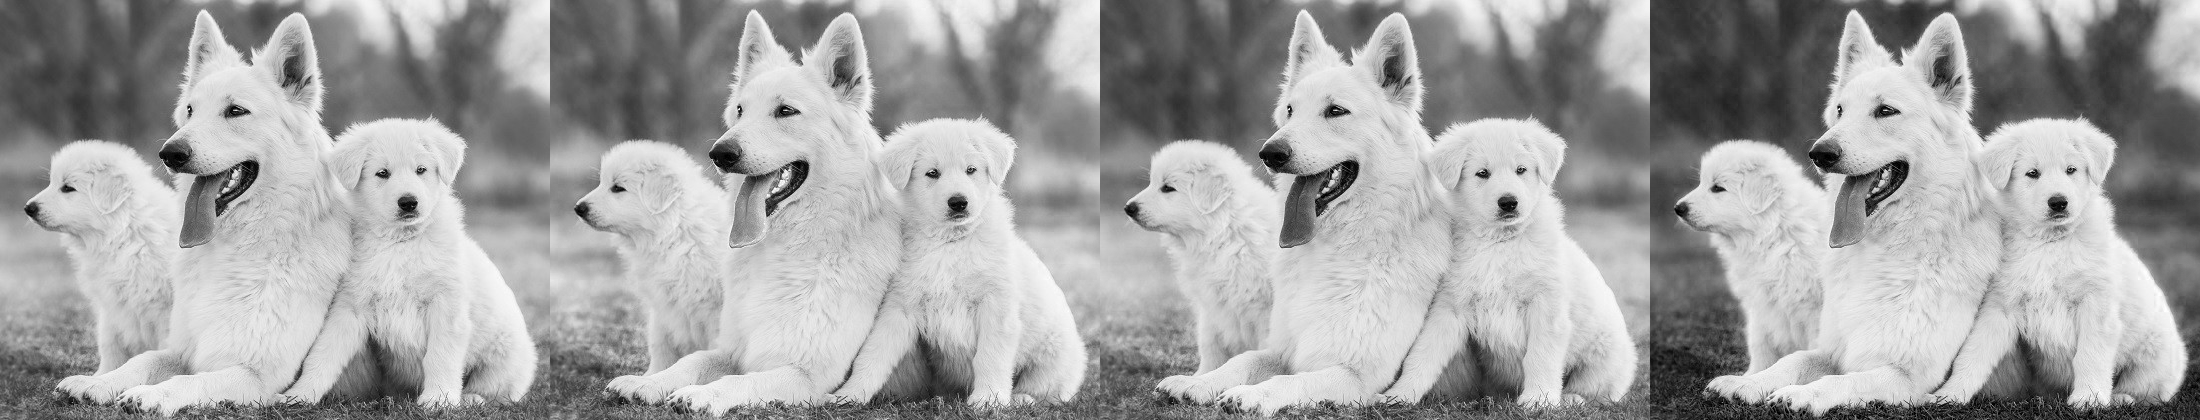

In [ ]:
R, G, B = dogImg.split()

displaySidebySide(dogImgGray, R, G, B)

As can be seen Blue has the highest contrast. Applying threshold to get the dogs

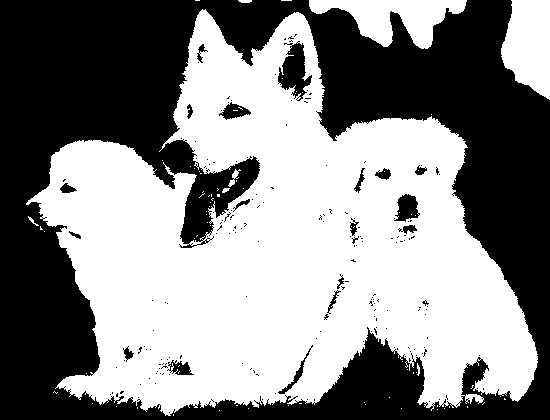

In [ ]:
threshold = 150
dogImgThres = B.point(lambda x: 255 if x > threshold else 0)
dogImgThres = dogImgThres.convert("1")
dogImgThres

In [ ]:
B.size

(550, 420)

Removing the white patch from the top right corner

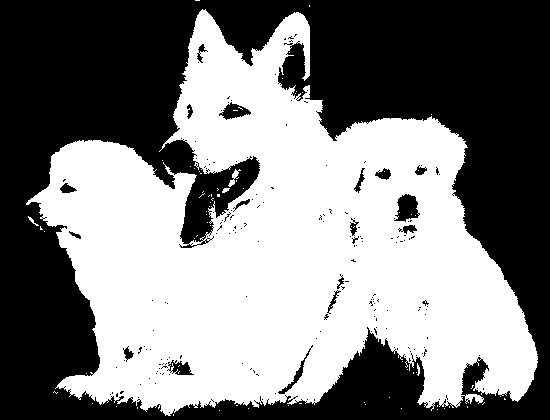

In [ ]:
black = Image.new('L', ((240, 100)))
black2 = Image.new('L', ((240, 5)))
dogImgThres.paste(black, (310, 0))
dogImgThres.paste(black2, (200, 0))
dogImgThres

Now, since we get a clear view of where the dogs are. We can use the image processing techniques called erosion and dilation to create a better mask that represents the dogs.

In [ ]:
def erode(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MinFilter(3))
  return image

def dilate(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MaxFilter(3))
  return image

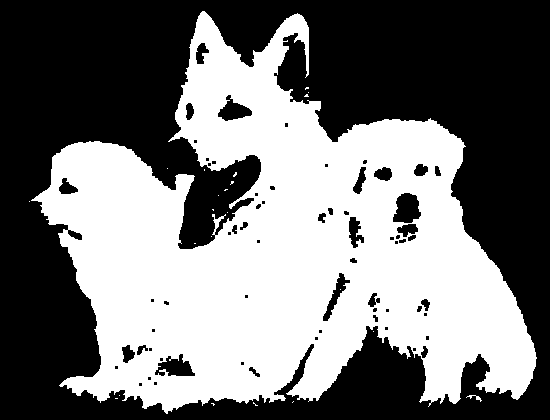

In [ ]:
step_1 = erode(1, dogImgThres)
step_1

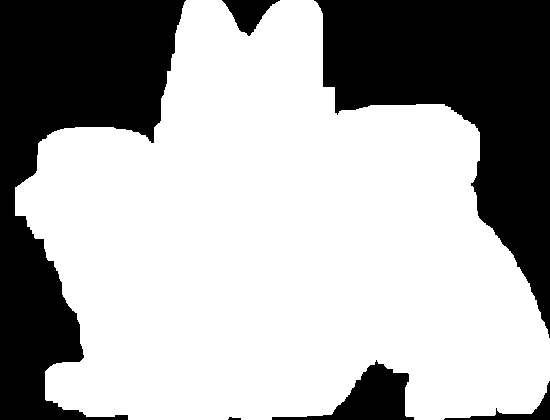

In [ ]:
step_2 = dilate(14, step_1)
step_2

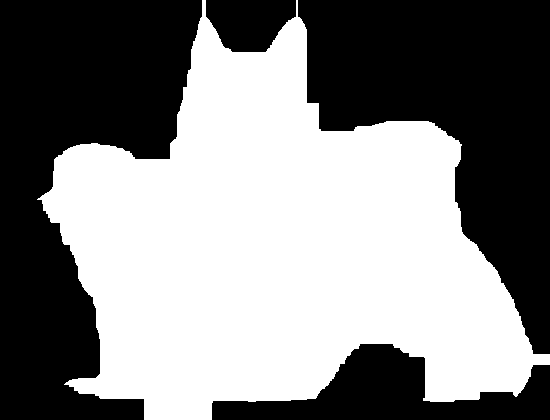

In [ ]:
dogsMask = erode(16, step_2)
dogsMask

The result is a mask that you can use to segment the image of the dogs

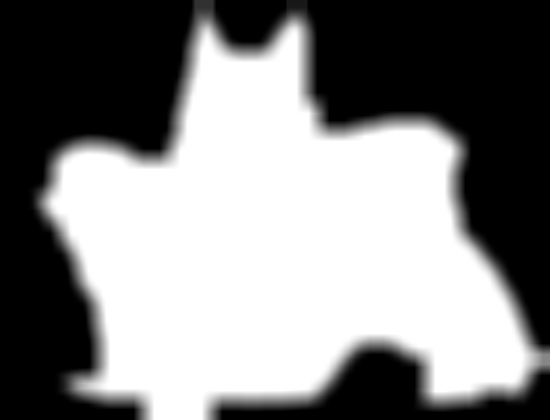

In [ ]:
#Blurring the mask to avoid sharp edges
dogsMask = dogsMask.convert("L")
dogsMask = dogsMask.filter(ImageFilter.BoxBlur(10))
dogsMask

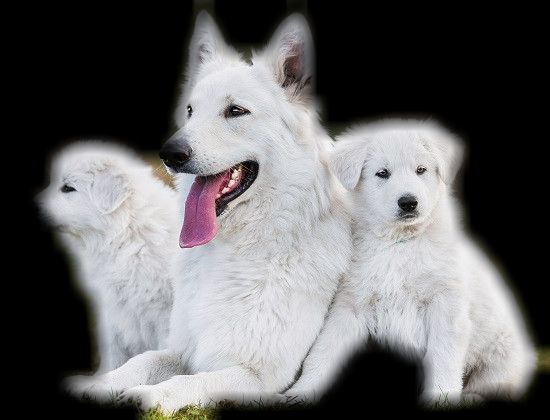

In [ ]:
blank = dogImg.point(lambda _: 0)
dogSegmented = Image.composite(dogImg, blank, dogsMask)
dogSegmented

###Superimposition of Images

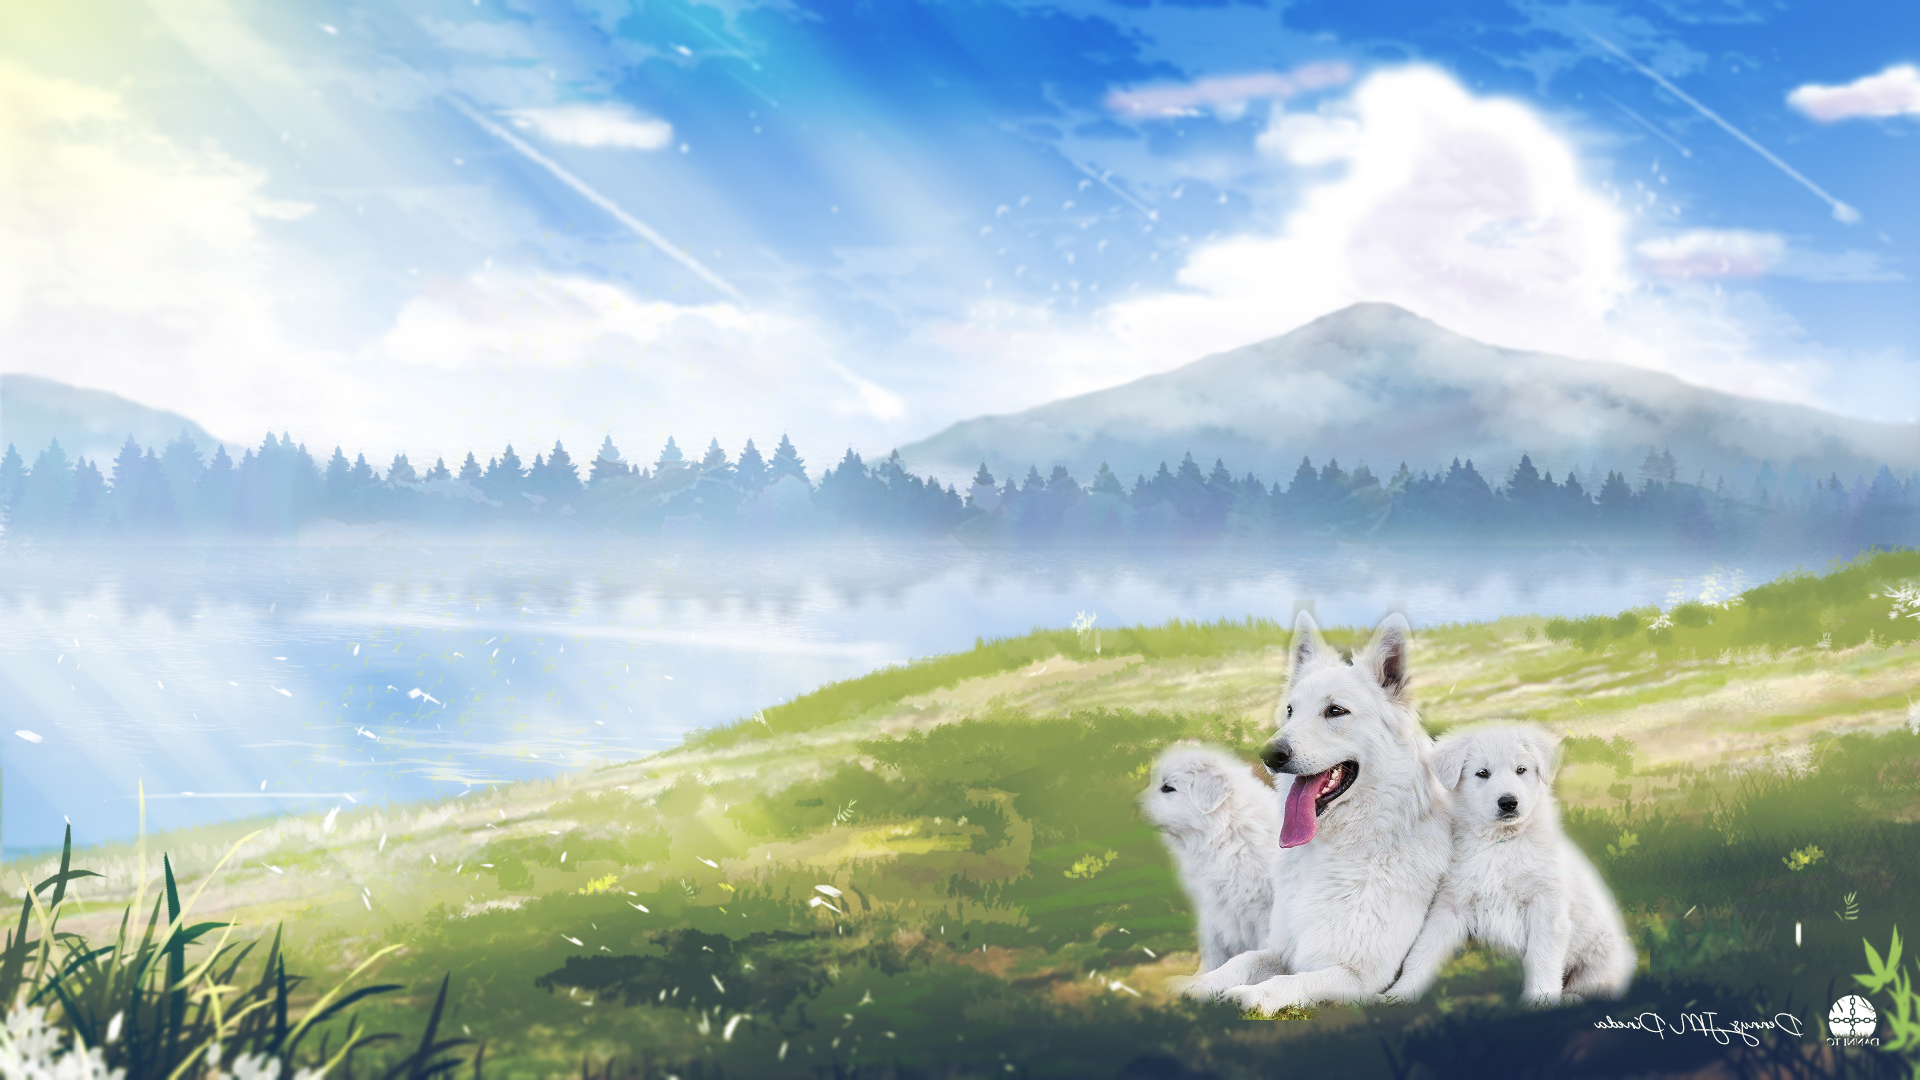

In [ ]:
backImg.paste(
    dogImg.resize((dogImg.width, dogImg.height)),
    (1100, 600),
    dogsMask.resize((dogsMask.width, dogsMask.height))
    )

backImg